## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization, Activation
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [16, 256]
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for B_S in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("BATCH_SIZE: %.3s" % (B_S))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=B_S,
              validation_data=(x_test, y_test),
              #verbose=0,  #不顯示訓練過程
              shuffle=True)

    # Collect results
    exp_name_tag = ("B_S-%.3s" % (B_S))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"]}

BATCH_SIZE: 16
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)    

50000/50000 [==============================] - 47s 932us/step - loss: 1.1308 - accuracy: 0.5994 - val_loss: 1.3108 - val_accuracy: 0.5376
Epoch 46/50
50000/50000 [==============================] - 47s 935us/step - loss: 1.1245 - accuracy: 0.5996 - val_loss: 1.3446 - val_accuracy: 0.5337
Epoch 47/50
50000/50000 [==============================] - 47s 943us/step - loss: 1.1162 - accuracy: 0.6033 - val_loss: 1.3612 - val_accuracy: 0.5197
Epoch 48/50
50000/50000 [==============================] - 48s 954us/step - loss: 1.1114 - accuracy: 0.6083 - val_loss: 1.3845 - val_accuracy: 0.5168
Epoch 49/50
50000/50000 [==============================] - 49s 976us/step - loss: 1.1070 - accuracy: 0.6109 - val_loss: 1.3565 - val_accuracy: 0.5303
Epoch 50/50
50000/50000 [==============================] - 48s 951us/step - loss: 1.0963 - accuracy: 0.6108 - val_loss: 1.3846 - val_accuracy: 0.5265
BATCH_SIZE: 256
Model: "model_1"
_________________________________________________________________
Layer (type) 

50000/50000 [==============================] - 7s 140us/step - loss: 0.2969 - accuracy: 0.9078 - val_loss: 2.2175 - val_accuracy: 0.4514
Epoch 41/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.2804 - accuracy: 0.9163 - val_loss: 2.3123 - val_accuracy: 0.4695
Epoch 42/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.2678 - accuracy: 0.9194 - val_loss: 2.3330 - val_accuracy: 0.4527
Epoch 43/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.2511 - accuracy: 0.9252 - val_loss: 2.2665 - val_accuracy: 0.4595
Epoch 44/50
50000/50000 [==============================] - 8s 154us/step - loss: 0.2389 - accuracy: 0.9306 - val_loss: 2.3812 - val_accuracy: 0.4524
Epoch 45/50
50000/50000 [==============================] - 7s 149us/step - loss: 0.2231 - accuracy: 0.9346 - val_loss: 2.2933 - val_accuracy: 0.4721
Epoch 46/50
50000/50000 [==============================] - 7s 144us/step - loss: 0.2134 - accuracy: 0.9396 - val_loss:

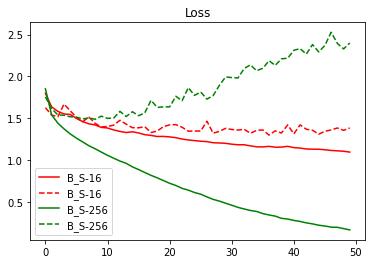

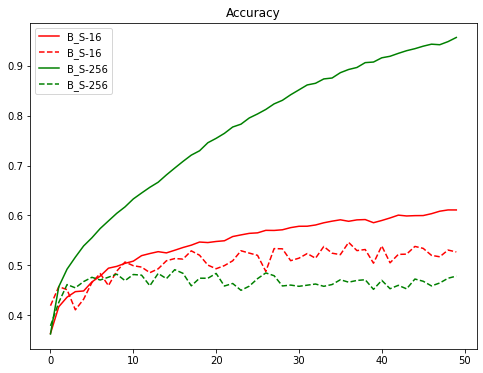

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [9]:
# 請於 BN 放在 Input Layer 後，並比較結果
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    x = BatchNormalization()(input_layer)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
        else:

            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [11]:
keras.backend.clear_session() # 把舊的 Graph 清掉
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,751,178
Trainable params: 1,745,034
Non-trainable params: 6,144
_____________________________________________

Epoch 48/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.8519 - accuracy: 0.7223 - val_loss: 1.4061 - val_accuracy: 0.5264
Epoch 49/50
50000/50000 [==============================] - 6s 121us/step - loss: 0.8384 - accuracy: 0.7283 - val_loss: 1.4095 - val_accuracy: 0.5269
Epoch 50/50
50000/50000 [==============================] - 6s 123us/step - loss: 0.8243 - accuracy: 0.7325 - val_loss: 1.4084 - val_accuracy: 0.5289


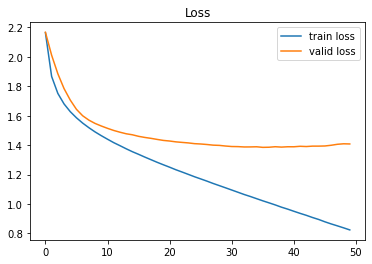

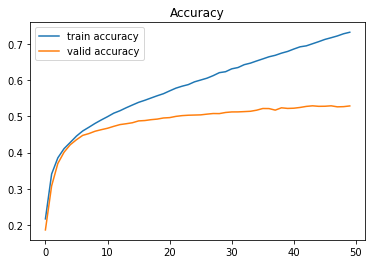

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [13]:
# 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
            x = keras.layers.Activation('relu')(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            x = keras.layers.Activation('relu')(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [14]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [15]:
keras.backend.clear_session() # 把舊的 Graph 清掉
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0   

Epoch 44/50
50000/50000 [==============================] - 4s 85us/step - loss: 0.6515 - accuracy: 0.8088 - val_loss: 1.4642 - val_accuracy: 0.5106
Epoch 45/50
50000/50000 [==============================] - 4s 86us/step - loss: 0.6331 - accuracy: 0.8162 - val_loss: 1.4809 - val_accuracy: 0.5029
Epoch 46/50
50000/50000 [==============================] - 4s 86us/step - loss: 0.6152 - accuracy: 0.8235 - val_loss: 1.5004 - val_accuracy: 0.5010
Epoch 47/50
50000/50000 [==============================] - 4s 85us/step - loss: 0.5964 - accuracy: 0.8321 - val_loss: 1.4892 - val_accuracy: 0.4989
Epoch 48/50
50000/50000 [==============================] - 4s 89us/step - loss: 0.5791 - accuracy: 0.8374 - val_loss: 1.5029 - val_accuracy: 0.4989
Epoch 49/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.5612 - accuracy: 0.8447 - val_loss: 1.5007 - val_accuracy: 0.4999
Epoch 50/50
50000/50000 [==============================] - 4s 85us/step - loss: 0.5436 - accuracy: 0.8520 - val_

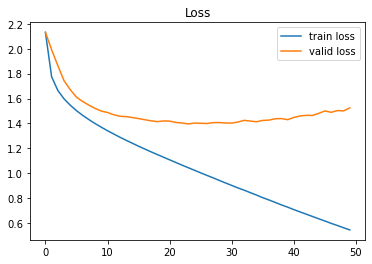

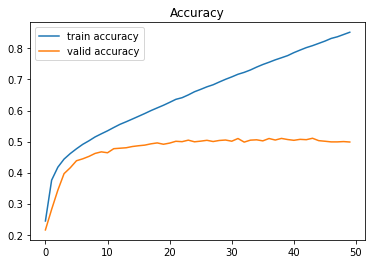

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()